# Python Data Science 
This tutorial will introduce you to several aspects of coding, how to manipulate data, the program language Python, and the power of Jupyter Notebook. Note you are not required to learn how to code for this course, just some basic introduction into the life of a bioinformatician. 

This tutorial is being presented in Jupyter Notebook, which is essentially markdown (html), that has Python development environment integrated in it. Jupyter Notebook is very useful for research, coding, taking notes and even making personal websites, because it displays things in a very neat looking customizable format.

Python in my opinion is the best language for bioinformatics/science. Many people say learning R will make you very attractive in the job market, but Python can do everything R can do better and also some other things R could never dream of. The syntax actually makes sense, and in general has more dev support. Python 3.6 is the current iteration of the language, this was recently updated from Python 2.7 so there may be conflicts in syntax as you see below. This tutorial uses the newest version.

Before we start coding, I am going to load the following packages. Some of these packages relate to making aesthetically pleasing graphs and the ability to use certain number functions. Its common to load required packages at the beginning of a coding session. This is analogous to the 'module load' on the cluster.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib import rc
import numpy as numpy
import sys

Here we introduce some basic concepts of coding for bioinformatics. Including assigning data to variables and manipulating these variables. What do you expect to be the answers for the following lines, and why? The + is concatenation or addition.

In [16]:
3 + 4

7

In [21]:
x = 3
y = 4
z = 'biology'
number1 = 3
number2 =4
A = ['biology', 'chemistry', 'physics']

In [18]:
x + y

7

In [22]:
number1 + x

6

In [24]:
x + z

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [25]:
'x' + 'y'

'xy'

In [27]:
'x' + z

'xbiology'

In [31]:
x*x

9

In [34]:
z*x

'biologybiologybiology'

In [36]:
z[3]
z[0]

'b'

In [39]:
z + A[2]

'physicsbiology'

In [42]:
for word in A:
    print(word)

biology
chemistry
physics


## Advanced Stuff
Below is a real life example of some work I have done over the summer, I wouldn't focus too much on the individual lines of code. Rather look at starting files (just regular blast format 6 output) and see just how a few lines of code can turn what seems to be nonsense into beautiful figures.

Below uses a "sub-language" of Python called PANDAS, which reads data into objects called dataframes. This language is essentially the R format but using python 3 instead. You may notice some inconsistencies in the syntax, sometimes we invoke a column by dataframe.column() and sometimes we just say dataframe[column], these are residual conflicts in the python 2 vs python 3 war. 

This data is a PSI-tBLASTn seach of inteins in a set of metagenomic data.

Have a look at the file <span style="color:blue">exteinbackground.tab</span> in your downloads folder. It is blast output, this block functions to read that tab delimited output as a table (below). The table created is called <span style="color:red">extreadin</span>

In [2]:
extreadin = pd.read_csv("exteinbackground.tab", header=None, sep='\t',  lineterminator='\n')
extreadin.columns = ['contig', 'start', 'end','name', "seqs"]
extreadin['direction'] = ''
extreadin

,contig,start,end,name,seqs,direction
0,NODE_7893_length_1825_cov_9.683638.ext,116,340,DNA-directed RNA polymerase subunit A'' [Natri...,MNTFHYAGVAEIDVTQGLPRLIELVDARKEPDTPMMTVHLEGEYAT...,
1,NODE_7893_length_1825_cov_9.683638.ext,1,114,DNA-directed RNA polymerase subunit A'' [Natri...,KADEIAKAVENRYLDTRVDPLDPVGTVSAQSIGEPGTQ,
2,NODE_151_length_12378_cov_7.219820.ext,10894,9683,DNA-directed RNA polymerase subunit A' [Halove...,AIQDHVTATYLLTNQNPRFNETQALDLLRATRIDELPDADGTEDGK...,
3,NODE_624_length_7599_cov_4.556501.ext,939,310,"DNA polymerase, partial [Halobacteriales archa...",DTTAKLQMMNELAAVFFREFAGQTSRGKRIPSFVFHLPDERQRLFL...,
4,NODE_624_length_7599_cov_4.556501.ext,1938,1756,"DNA polymerase, partial [Halobacteriales archa...",EQADLGSFDDGRPADEAAAVADGDGDDEGATVVDADSMRFPDPAWS...,
5,NODE_226_length_11074_cov_5.527235.ext,9591,8167,DNA-directed RNA polymerase subunit A' [Haloar...,SIMAHEVVVMPYKTFRLNTTVCPPYNADFDGDEMNMHALQNEEARA...,
6,NODE_1387_length_5201_cov_5.222287.ext,2443,656,hypothetical protein BRC71_11720 [Halobacteria...,TTLAAFGGGDPEEADRELEEARHVTEGDEVAELVDLSDHRFPDADG...,
7,NODE_1387_length_5201_cov_5.222287.ext,654,76,hypothetical protein BRC71_11720 [Halobacteria...,LYGVLGWDRFRLYDKEMGAAVTATGREVIEYTDEVVSNEGYEVVYG...,
8,NODE_896_length_6548_cov_4.400247.ext,1266,2543,threonine synthase [Halobacteriales archaeon Q...,MSAHLDLDEPVPDGATDGVWLTCIECGETFAPFEAVRYTCDDCDGL...,
9,NODE_4498_length_2641_cov_2.439158.ext,730,152,DNA polymerase elongation subunit [Haloplanus ...,DDFDAPYLIDRLEVLDPR--TDRDLDPDRLSRIGEVWRSDWGGPTI...,


This block uses the same table we created previously and determines weather the extein is on the forward or backward orientation using its start and end coordinates. Notice at the right end of the table there is a column labeled "direction" and the orientation of each intein.

In [3]:
for index, row in extreadin.iterrows():
    if (row['start'] - row['end']) > 0:
        extreadin.at[index, 'direction'] = 'rev'
    else:
        extreadin.at[index, 'direction'] = 'for'
        
extreadin

,contig,start,end,name,seqs,direction
0,NODE_7893_length_1825_cov_9.683638.ext,116,340,DNA-directed RNA polymerase subunit A'' [Natri...,MNTFHYAGVAEIDVTQGLPRLIELVDARKEPDTPMMTVHLEGEYAT...,for
1,NODE_7893_length_1825_cov_9.683638.ext,1,114,DNA-directed RNA polymerase subunit A'' [Natri...,KADEIAKAVENRYLDTRVDPLDPVGTVSAQSIGEPGTQ,for
2,NODE_151_length_12378_cov_7.219820.ext,10894,9683,DNA-directed RNA polymerase subunit A' [Halove...,AIQDHVTATYLLTNQNPRFNETQALDLLRATRIDELPDADGTEDGK...,rev
3,NODE_624_length_7599_cov_4.556501.ext,939,310,"DNA polymerase, partial [Halobacteriales archa...",DTTAKLQMMNELAAVFFREFAGQTSRGKRIPSFVFHLPDERQRLFL...,rev
4,NODE_624_length_7599_cov_4.556501.ext,1938,1756,"DNA polymerase, partial [Halobacteriales archa...",EQADLGSFDDGRPADEAAAVADGDGDDEGATVVDADSMRFPDPAWS...,rev
5,NODE_226_length_11074_cov_5.527235.ext,9591,8167,DNA-directed RNA polymerase subunit A' [Haloar...,SIMAHEVVVMPYKTFRLNTTVCPPYNADFDGDEMNMHALQNEEARA...,rev
6,NODE_1387_length_5201_cov_5.222287.ext,2443,656,hypothetical protein BRC71_11720 [Halobacteria...,TTLAAFGGGDPEEADRELEEARHVTEGDEVAELVDLSDHRFPDADG...,rev
7,NODE_1387_length_5201_cov_5.222287.ext,654,76,hypothetical protein BRC71_11720 [Halobacteria...,LYGVLGWDRFRLYDKEMGAAVTATGREVIEYTDEVVSNEGYEVVYG...,rev
8,NODE_896_length_6548_cov_4.400247.ext,1266,2543,threonine synthase [Halobacteriales archaeon Q...,MSAHLDLDEPVPDGATDGVWLTCIECGETFAPFEAVRYTCDDCDGL...,for
9,NODE_4498_length_2641_cov_2.439158.ext,730,152,DNA polymerase elongation subunit [Haloplanus ...,DDFDAPYLIDRLEVLDPR--TDRDLDPDRLSRIGEVWRSDWGGPTI...,rev


This just makes my columns more visible.

In [4]:
extreadin['contig'] = extreadin['contig'].map(lambda x: x.rstrip('.ext'))
extreadin = extreadin.drop(['direction', 'start', 'end'], axis=1)

Now take a look at the <span style="color:blue">seqs.csv</span>, this is similar to the previous file except this contains the inteins that are located inside the exteins. We read this into this notebook with a similar code. The table created from this is called <span style="color:red">intseqsreadin</span>.

After this new table is created, I join the two tables using a left-join combining the exteins and inteins found in the same genomic position. This is on the basis of the name of the contig. This new combined table that summarizes both intein and extein data is called <span style="color:green">lowmeyg</span>

In [5]:
intseqsreadin = pd.read_csv("seqs.csv", sep='\t', lineterminator='\n', header=None)
intseqsreadin.columns = ['contig', 'inteintype','qstart', 'qstop', 'inteinseq', 'full']
lowmeyg = intseqsreadin.merge(extreadin, how='left', left_on='contig', right_on='contig')
lowmeyg

,contig,inteintype,qstart,qstop,inteinseq,full,name,seqs
0,NODE_102423_length_528_cov_4.824834,NmaATCC43099_PolB2,9,305,HYDDDRSVTFSSRVWADLLEQLCGKGSEQKAIPDLVFSASKKQKRR...,no,hypothetical protein [Haloarcula amylolytica]<...,TDTFLELLAWYITEGSIYRADTANYRIKIAQEDASTRSRIASIVDQ...
1,NODE_102735_length_528_cov_1.137472,PmaEXH1_GyrA,341,24,YCVTGNSLITTNRCLEKIENI-PEGDEVEQN-IDLKVLSFDKKINP...,no,NaN,NaN
2,NODE_102816_length_528_cov_0.835920,FacFer1_RIR1,13,522,GWVEAQNLEPGDSVHVQNRKGEFGQHGSAEEGRVLGWLVGDGHLK-...,yes,NaN,NaN
3,NODE_10741_length_1498_cov_4.616467,Mja_RFC1,616,1422,EFAQFLALLISEGHEQQVTENNYRILFTNSDEELRSQFVTLAEDLF...,no,NaN,NaN
4,NODE_10748_length_1498_cov_1.308937,Hwa_PolII1,1498,407,DTIDNDRLMLKGLDKDDL-SELFTEELADEWDGDFYPLKSTAEYLG...,no,DNA polymerase II large subunit [Haloferacacea...,DGDEDCVMLLMDGLLNFSRKYLPDKRGGRMDAPLVMSSRIDPSEID...
5,NODE_10882_length_1485_cov_8.552557,Hut_MCM2,744,298,AAVDELDKMRCVTGETLVHFDDRITRIGEFAREAAKTGEVEELSNG...,yes,intein-containing Cdc46/Mcm family DNA replica...,GRTIRSVDASVWTMTETGRLVTRPVTAVHEYEAPDELTDVTLTTGE...
6,NODE_10882_length_1485_cov_8.552557,Hut_MCM2,744,298,AAVDELDKMRCVTGETLVHFDDRITRIGEFAREAAKTGEVEELSNG...,yes,intein-containing Cdc46/Mcm family DNA replica...,LVLADQGIAAVDELDKMRCVTGETLVHF-DDRITRIGEFAREAAKT...
7,NODE_108848_length_515_cov_86.495434,Hma_PolB,2,382,LCGADSETKRIPEFVFEASREQKRRFLETLIDGDGDRQKNSWRYST...,no,hypothetical protein [Halopenitus persicus],LYGVSGWDRFRLYDKDNAAAVTATGREVIQFTEEKASEIDKEV
8,NODE_110_length_13481_cov_12.360713,MespFS406_PolB3,11588,12736,QSLTPDQHVLVRRGGEIQFIPIGVLCDAYLPE-----------EGE...,no,DNA gyrase subunit A [Halobacteriales archaeon...,MSSDIPEDVNVEEAAPAAHMERVRVEDEMEQSYIDYAMSVIAGRAL...
9,NODE_111_length_13478_cov_7.543168,Hwa_RIR12,1002,4,GCVEENSLVSTDEGLRPIKDLDETTAEFEQWGELEVGVSTDGGTKT...,no,hypothetical protein BRD01_07810 [Halobacteria...,MERLSFTPNCLPPDSLVAAEGGMKRLTDVEPGERVYDDEDGTARVE...


If we look what NCBI has annotated each intein-containing gene as ('name' column in <span style="color:red">extreadin</span>), the titles are not very visible or clear. Using the following lines I break up the title into the name of the gene and the name of the organism, reflected in the new columns.

In [6]:
lowmeyg['contig'] = lowmeyg['contig'].map(lambda x: re.sub(r'_length_\d+_cov_\d+\.\d+', "", x))

lowmeyg['organism'] = lowmeyg['name'].map(lambda x: re.search(r'\[.+?(?=\])|$', str(x)).group())
lowmeyg['gene'] = lowmeyg['name'].map(lambda x: re.search(r'^.+?(?=\[)|$', str(x)).group())
lowmeyg.drop(['name'], axis=1)

lowmeyg['organism'] = lowmeyg['organism'].map(lambda x: x.lstrip('['))
lowmeyg = lowmeyg.drop(["name"], axis=1)
lowmeyg

,contig,inteintype,qstart,qstop,inteinseq,full,seqs,organism,gene
0,NODE_102423,NmaATCC43099_PolB2,9,305,HYDDDRSVTFSSRVWADLLEQLCGKGSEQKAIPDLVFSASKKQKRR...,no,TDTFLELLAWYITEGSIYRADTANYRIKIAQEDASTRSRIASIVDQ...,Haloarcula amylolytica,hypothetical protein
1,NODE_102735,PmaEXH1_GyrA,341,24,YCVTGNSLITTNRCLEKIENI-PEGDEVEQN-IDLKVLSFDKKINP...,no,NaN,,
2,NODE_102816,FacFer1_RIR1,13,522,GWVEAQNLEPGDSVHVQNRKGEFGQHGSAEEGRVLGWLVGDGHLK-...,yes,NaN,,
3,NODE_10741,Mja_RFC1,616,1422,EFAQFLALLISEGHEQQVTENNYRILFTNSDEELRSQFVTLAEDLF...,no,NaN,,
4,NODE_10748,Hwa_PolII1,1498,407,DTIDNDRLMLKGLDKDDL-SELFTEELADEWDGDFYPLKSTAEYLG...,no,DGDEDCVMLLMDGLLNFSRKYLPDKRGGRMDAPLVMSSRIDPSEID...,Haloferacaceae archaeon SYSU A9-0,DNA polymerase II large subunit
5,NODE_10882,Hut_MCM2,744,298,AAVDELDKMRCVTGETLVHFDDRITRIGEFAREAAKTGEVEELSNG...,yes,GRTIRSVDASVWTMTETGRLVTRPVTAVHEYEAPDELTDVTLTTGE...,Haloplanus natans,intein-containing Cdc46/Mcm family DNA replica...
6,NODE_10882,Hut_MCM2,744,298,AAVDELDKMRCVTGETLVHFDDRITRIGEFAREAAKTGEVEELSNG...,yes,LVLADQGIAAVDELDKMRCVTGETLVHF-DDRITRIGEFAREAAKT...,Haloplanus natans,intein-containing Cdc46/Mcm family DNA replica...
7,NODE_108848,Hma_PolB,2,382,LCGADSETKRIPEFVFEASREQKRRFLETLIDGDGDRQKNSWRYST...,no,LYGVSGWDRFRLYDKDNAAAVTATGREVIQFTEEKASEIDKEV,Halopenitus persicus,hypothetical protein
8,NODE_110,MespFS406_PolB3,11588,12736,QSLTPDQHVLVRRGGEIQFIPIGVLCDAYLPE-----------EGE...,no,MSSDIPEDVNVEEAAPAAHMERVRVEDEMEQSYIDYAMSVIAGRAL...,Halobacteriales archaeon SW_7_65_23,DNA gyrase subunit A
9,NODE_111,Hwa_RIR12,1002,4,GCVEENSLVSTDEGLRPIKDLDETTAEFEQWGELEVGVSTDGGTKT...,no,MERLSFTPNCLPPDSLVAAEGGMKRLTDVEPGERVYDDEDGTARVE...,Halobacteriales archaeon QS_8_65_32,hypothetical protein BRD01_07810


The following line showcases the power of this notebook. We have the sequences and the names of the sequences of the in the table created earlier. I now create a fasta formatted file by manipulating some of the columns in the table, and yes it is as easy as a 1 liner! Have a look at the output file <span style="color:blue">inteinseqs.txt</span>

In [7]:
for index, row in lowmeyg.iterrows():
    print (">" + row['contig']+ "\n"+ row['inteinseq'], file=open("inteinseqs.txt", "a"))


Now back to the table lowmeyg, notice how the inteintype annotations are very messy. In order to clean this up for graphing purposes, I change the names of inteintypes by using reading in a fasta file into a predefined dictionary and changes the names to be more organized. This fasta file is <span style="color:blue">intein.db</span>

Look two blocks down and see the new inteintype names in the table.

In [8]:
inteindict ={}
with open("/media/tian/Shared/intein.db", 'r') as f1:
    for line in f1:
        line = line.strip()
        if not line:
            continue
        if line.startswith("["):
            active_intein = line[1:-4]
            continue
        if line.startswith(">"):
            intname = line[1:]
            inteindict[intname] = (active_intein)

for index, row in lowmeyg.iterrows():
    if  row['inteintype'] in inteindict:
        lowmeyg.at[index, 'inteintype'] = inteindict[row['inteintype']]

Recall that inteins can exist in two states, a full intein and a mini intein (where the homing endonuclease is gone). This line classifies each intein as such and creates the "full" column where yes means it is a full intein.

In [9]:
for index,row in lowmeyg.iterrows():
    if row['full'] == 'no':
        lowmeyg.at[index, 'full'] = numpy.nan
lowmeyg

,contig,inteintype,qstart,qstop,inteinseq,full,seqs,organism,gene
0,NODE_102423,polBb,9,305,HYDDDRSVTFSSRVWADLLEQLCGKGSEQKAIPDLVFSASKKQKRR...,NaN,TDTFLELLAWYITEGSIYRADTANYRIKIAQEDASTRSRIASIVDQ...,Haloarcula amylolytica,hypothetical protein
1,NODE_102735,gyrAa,341,24,YCVTGNSLITTNRCLEKIENI-PEGDEVEQN-IDLKVLSFDKKINP...,NaN,NaN,,
2,NODE_102816,rir1b,13,522,GWVEAQNLEPGDSVHVQNRKGEFGQHGSAEEGRVLGWLVGDGHLK-...,yes,NaN,,
3,NODE_10741,rfc_a,616,1422,EFAQFLALLISEGHEQQVTENNYRILFTNSDEELRSQFVTLAEDLF...,NaN,NaN,,
4,NODE_10748,pol_IIa,1498,407,DTIDNDRLMLKGLDKDDL-SELFTEELADEWDGDFYPLKSTAEYLG...,NaN,DGDEDCVMLLMDGLLNFSRKYLPDKRGGRMDAPLVMSSRIDPSEID...,Haloferacaceae archaeon SYSU A9-0,DNA polymerase II large subunit
5,NODE_10882,cdc21d,744,298,AAVDELDKMRCVTGETLVHFDDRITRIGEFAREAAKTGEVEELSNG...,yes,GRTIRSVDASVWTMTETGRLVTRPVTAVHEYEAPDELTDVTLTTGE...,Haloplanus natans,intein-containing Cdc46/Mcm family DNA replica...
6,NODE_10882,cdc21d,744,298,AAVDELDKMRCVTGETLVHFDDRITRIGEFAREAAKTGEVEELSNG...,yes,LVLADQGIAAVDELDKMRCVTGETLVHF-DDRITRIGEFAREAAKT...,Haloplanus natans,intein-containing Cdc46/Mcm family DNA replica...
7,NODE_108848,polBb,2,382,LCGADSETKRIPEFVFEASREQKRRFLETLIDGDGDRQKNSWRYST...,NaN,LYGVSGWDRFRLYDKDNAAAVTATGREVIQFTEEKASEIDKEV,Halopenitus persicus,hypothetical protein
8,NODE_110,polBb,11588,12736,QSLTPDQHVLVRRGGEIQFIPIGVLCDAYLPE-----------EGE...,NaN,MSSDIPEDVNVEEAAPAAHMERVRVEDEMEQSYIDYAMSVIAGRAL...,Halobacteriales archaeon SW_7_65_23,DNA gyrase subunit A
9,NODE_111,rir1g,1002,4,GCVEENSLVSTDEGLRPIKDLDETTAEFEQWGELEVGVSTDGGTKT...,NaN,MERLSFTPNCLPPDSLVAAEGGMKRLTDVEPGERVYDDEDGTARVE...,Halobacteriales archaeon QS_8_65_32,hypothetical protein BRD01_07810


Were now ready to create some graphs from this data since its properly organized. We start by making a sub table from our large table for a barplot. This barplot aggregates our table based on the type of intein and the number of full and mini inteins.

In [10]:
barplot = lowmeyg.groupby('inteintype').agg({'inteintype': "count",
                                      'full': "count"})
barplot.columns = ['totalcounts', 'fullcounts']
barplot.index.name = 'inteintype'
barplot.reset_index(inplace=True)
for ind, row in barplot.iterrows():
    count = row['totalcounts'] - row['fullcounts']
    barplot.set_value(ind, 'minicounts', count)
barplot

/home/tian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,inteintype,totalcounts,fullcounts,minicounts
0,cdc21a,23,10,13.0
1,cdc21b,4,1,3.0
2,cdc21c,6,2,4.0
3,cdc21d,16,8,8.0
4,dnaBa,1,0,1.0
5,gi|339757395|gb|EGQ40976.1|,4,3,1.0
6,gyrAa,1,0,1.0
7,gyrBa,10,5,5.0
8,gyrBb,1,1,0.0
9,if2a,3,1,2.0


This block plots are sub-table into said bargraph. Maybe play around witht the colors and coordinates if you feel like it. The bar plot is shownas raw counts of the inteins.

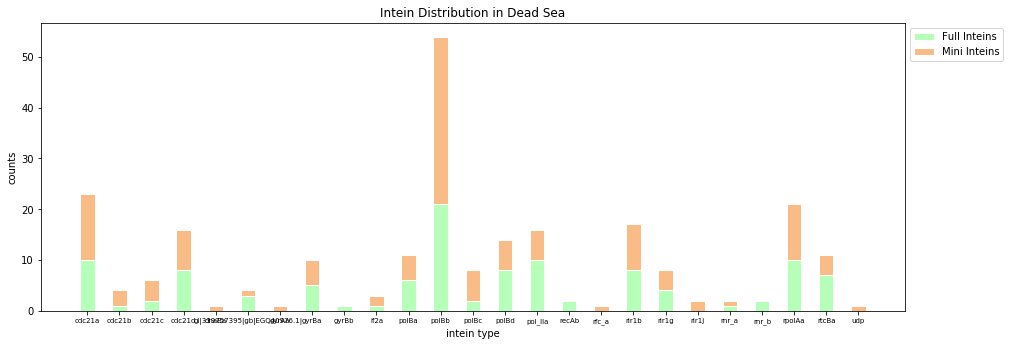

In [11]:
barWidth = .45
r = list(range(0, 26))
names = list(barplot['inteintype'])
greenbars = list(barplot['fullcounts'])
orangebars = list(barplot['minicounts'])
totals = list(barplot['totalcounts'])


ax1 = plt.axes([0,0,2,1])
ax1.bar(names, greenbars, color='#b5ffb9', edgecolor='white', width=barWidth, label="Full Inteins")
ax1.bar(names, orangebars, bottom=greenbars, color='#f9bc86', edgecolor='white', width=barWidth, label="Mini Inteins")


ax1.set_xlabel("intein type")
ax1.set_ylabel("counts")
ax1.set_title("Intein Distribution in Dead Sea")
ax1.tick_params(axis='x', labelsize=7 )
ax1.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
#ax1.figure(figsize=(20,4), dpi= 300)


plt.savefig("intein.pdf", bbox_inches='tight')
pic = plt.show()

For the next visualization, we want to plot the number of inteins for each domain of life/virus. First we have to classify the extein to its proper domain. I do that with an advanced for loop function built in to pandas called iterrows. Look at the newly added domain column

In [14]:
for index, row in lowmeyg.iterrows():
    if 'virus' in row['organism'] or 'phage' in row['organism']:
        lowmeyg.set_value(index, 'domain', 'virus')
    elif 'bacterium' in row['organism'] or 'Spiro' in row['organism']:
        lowmeyg.set_value(index, 'domain', 'bacteria')
    elif row['organism'] == '':
        lowmeyg.set_value(index, 'domain', 'unclass')
    elif 'Blumeria' in row['organism'] or 'Cyprinus' in row['organism'] :
        lowmeyg.set_value(index, 'domain', 'eukarya')    
    else:
        lowmeyg.set_value(index, 'domain', 'archaea')
        
lowmeyg

/home/tian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/home/tian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/home/tian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/home/tian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


,contig,inteintype,qstart,qstop,inteinseq,full,seqs,organism,gene,domain
0,NODE_102423,polBb,9,305,HYDDDRSVTFSSRVWADLLEQLCGKGSEQKAIPDLVFSASKKQKRR...,NaN,TDTFLELLAWYITEGSIYRADTANYRIKIAQEDASTRSRIASIVDQ...,Haloarcula amylolytica,hypothetical protein,archaea
1,NODE_102735,gyrAa,341,24,YCVTGNSLITTNRCLEKIENI-PEGDEVEQN-IDLKVLSFDKKINP...,NaN,NaN,,,unclass
2,NODE_102816,rir1b,13,522,GWVEAQNLEPGDSVHVQNRKGEFGQHGSAEEGRVLGWLVGDGHLK-...,yes,NaN,,,unclass
3,NODE_10741,rfc_a,616,1422,EFAQFLALLISEGHEQQVTENNYRILFTNSDEELRSQFVTLAEDLF...,NaN,NaN,,,unclass
4,NODE_10748,pol_IIa,1498,407,DTIDNDRLMLKGLDKDDL-SELFTEELADEWDGDFYPLKSTAEYLG...,NaN,DGDEDCVMLLMDGLLNFSRKYLPDKRGGRMDAPLVMSSRIDPSEID...,Haloferacaceae archaeon SYSU A9-0,DNA polymerase II large subunit,archaea
5,NODE_10882,cdc21d,744,298,AAVDELDKMRCVTGETLVHFDDRITRIGEFAREAAKTGEVEELSNG...,yes,GRTIRSVDASVWTMTETGRLVTRPVTAVHEYEAPDELTDVTLTTGE...,Haloplanus natans,intein-containing Cdc46/Mcm family DNA replica...,archaea
6,NODE_10882,cdc21d,744,298,AAVDELDKMRCVTGETLVHFDDRITRIGEFAREAAKTGEVEELSNG...,yes,LVLADQGIAAVDELDKMRCVTGETLVHF-DDRITRIGEFAREAAKT...,Haloplanus natans,intein-containing Cdc46/Mcm family DNA replica...,archaea
7,NODE_108848,polBb,2,382,LCGADSETKRIPEFVFEASREQKRRFLETLIDGDGDRQKNSWRYST...,NaN,LYGVSGWDRFRLYDKDNAAAVTATGREVIQFTEEKASEIDKEV,Halopenitus persicus,hypothetical protein,archaea
8,NODE_110,polBb,11588,12736,QSLTPDQHVLVRRGGEIQFIPIGVLCDAYLPE-----------EGE...,NaN,MSSDIPEDVNVEEAAPAAHMERVRVEDEMEQSYIDYAMSVIAGRAL...,Halobacteriales archaeon SW_7_65_23,DNA gyrase subunit A,archaea
9,NODE_111,rir1g,1002,4,GCVEENSLVSTDEGLRPIKDLDETTAEFEQWGELEVGVSTDGGTKT...,NaN,MERLSFTPNCLPPDSLVAAEGGMKRLTDVEPGERVYDDEDGTARVE...,Halobacteriales archaeon QS_8_65_32,hypothetical protein BRD01_07810,archaea


We then make a sub-table from our larger table, similar to before, and plot that table.

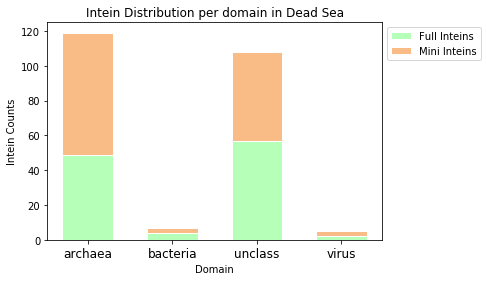

In [15]:
domainplt = lowmeyg.groupby('domain').count()
domainplt['mini'] = domainplt['contig'] - domainplt['full']

barWidth = .6
r = list(range(0, 4))
names = list(domainplt.index)
greenbars = list(domainplt['full'])
orangebars = list(domainplt ['mini'])
totals = list(domainplt['contig'])

plt.bar(r, greenbars, color='#b5ffb9', edgecolor='white', width=barWidth, label="Full Inteins")
plt.bar(r, orangebars, bottom=greenbars, color='#f9bc86', edgecolor='white', width=barWidth, label="Mini Inteins")

plt.xticks(r, names)
plt.xlabel("Domain")
plt.ylabel("Intein Counts")
plt.title("Intein Distribution per domain in Dead Sea")
plt.tick_params(axis='x', labelsize=12 )
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.savefig("domaindistro08.pdf", bbox_inches='tight')
pic = plt.show()